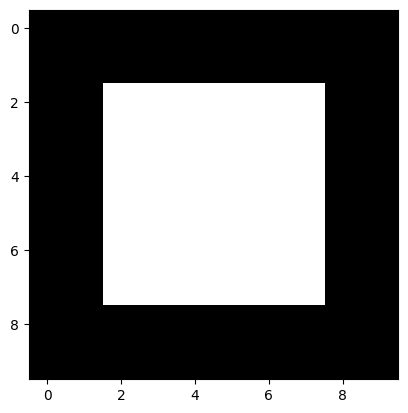

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# 이미지 생성 (단순 흰색 배경에 검은색 정사각형)
input = torch.zeros(1, 1, 10, 10)
input[:, :, 2:8, 2:8] = 1

def plot_image(tensor):
    plt.imshow(tensor[0, 0, :, :], cmap='gray')
    plt.show()

plot_image(input)


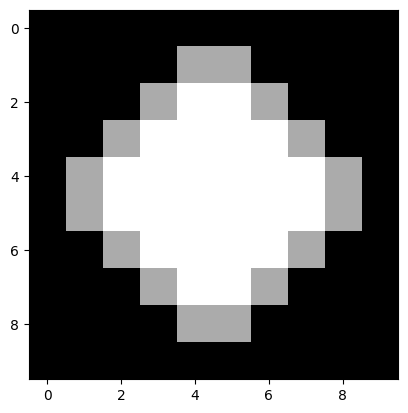

In [4]:
# 회전 각도
theta = np.pi / 4  # 45도

# 회전 변환 행렬 생성
rotation_matrix = torch.tensor([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0]
], dtype=torch.float)

# 정규화된 그리드 좌표 생성
grid_size = input.size(2)  # 입력 이미지의 높이와 너비 (동일하다고 가정)
normalized_coords = torch.linspace(-1, 1, grid_size)
meshgrid = torch.meshgrid(normalized_coords, normalized_coords)
grid = torch.stack(meshgrid, dim=-1).unsqueeze(0)  # (1, H, W, 2)

# 회전 적용
new_grid = torch.matmul(grid, rotation_matrix[:2, :2].T)

# grid_sample을 사용하여 이미지 샘플링
output = F.grid_sample(input, new_grid, mode='bilinear', align_corners=True)

plot_image(output)
